In [390]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F

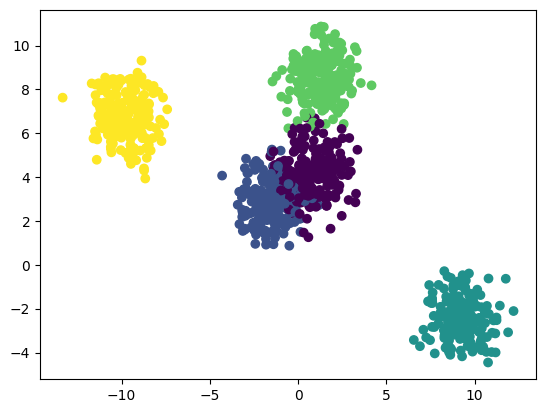

In [391]:
X, y = make_blobs(1000, centers=5, random_state=0, n_features=4, cluster_std=1)

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=y)

In [392]:
Xpy = torch.from_numpy(X).type(torch.float)
ypy = torch.from_numpy(y).type(torch.float)

Xpy_train, Xpy_test, ypy_train, ypy_test = train_test_split(Xpy,ypy, test_size=0.2, random_state=0)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [397]:
torch.manual_seed(0)
model_0 = nn.Sequential(
    nn.Linear(in_features=4, out_features=200),
    nn.Sigmoid(),
    nn.Linear(in_features=200, out_features=5),
)

model_0.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(Xpy_train.to(device))
    y_parsed_train = F.one_hot(ypy_train.type(torch.long)).type(torch.float)

    loss=criterion(y_logits, y_parsed_train)
    if epoch % (epochs / 10) == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 1.6422028541564941
Epoch: 10 | Loss: 1.102487325668335
Epoch: 20 | Loss: 0.7422981262207031
Epoch: 30 | Loss: 0.5113354325294495
Epoch: 40 | Loss: 0.3631752133369446
Epoch: 50 | Loss: 0.26674020290374756
Epoch: 60 | Loss: 0.20249348878860474
Epoch: 70 | Loss: 0.15843093395233154
Epoch: 80 | Loss: 0.12729841470718384
Epoch: 90 | Loss: 0.10463783144950867


In [398]:
model_0.eval()
y_pred = model_0(Xpy_test)
y_labels = torch.argmax(y_pred, 1)

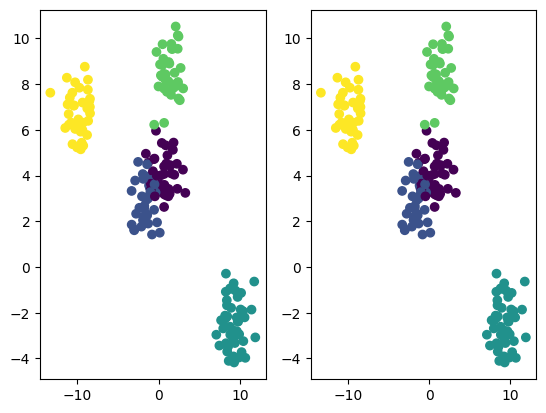

In [399]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(Xpy_test[:,0],Xpy_test[:,1], c=ypy_test)
ax[1].scatter(Xpy_test[:,0],Xpy_test[:,1], c=y_labels)
